In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


In [ ]:

df=pd.read_csv("/content/Automobile.csv")
df.head()


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


The dataset consists of the following columns:

Name: Unique identifier for each automobile.

MPG: Fuel efficiency measured in miles per gallon.

Cylinders: Number of cylinders in the engine.

Displacement: Engine displacement, indicating its size or capacity.

Horsepower: Power output of the engine.

Weight: Weight of the automobile.

Acceleration: Capability to increase speed, measured in seconds.

Model Year: Year of manufacture for the automobile model.

Origin: Country or region of origin for each automobile.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

Text(0.5, 1.0, 'Number of Missing Values')

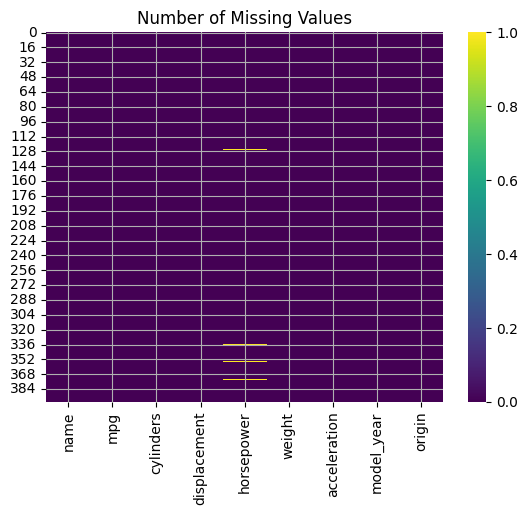

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")

In [ ]:

for col in df.columns:
  df[col]=df[col].fillna(df[col].mode()[0])

In [ ]:
df.duplicated().sum()

0

The histrogram below shows the distribution of horse power in bins. We can see that most vechilces have horsepower between (75-100) and 150.

The boxplot below shows the distribution of mpg offered by the no. of cylinders,mpg seems to increase with cylinders yet mpg of 5 cylinders is less compared to 4 cylinders, more cylinders can provide more power but may affect fuel efficiency. 4 cylinder  seem to be more effective.

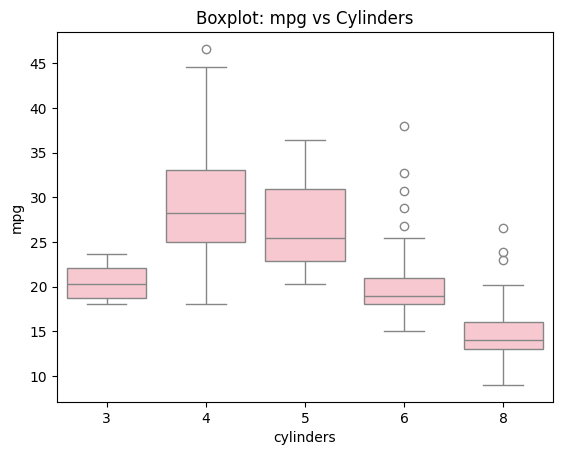

In [ ]:
# Boxplot for 'mpg' vs 'cylinders'
sns.boxplot(x='cylinders', y='mpg', data=df, color='pink')
plt.title('Boxplot: mpg vs Cylinders')
plt.show()

The plot below is the distribution of origins and their horsepower distribution through this we can clearly understand each country horsepower.

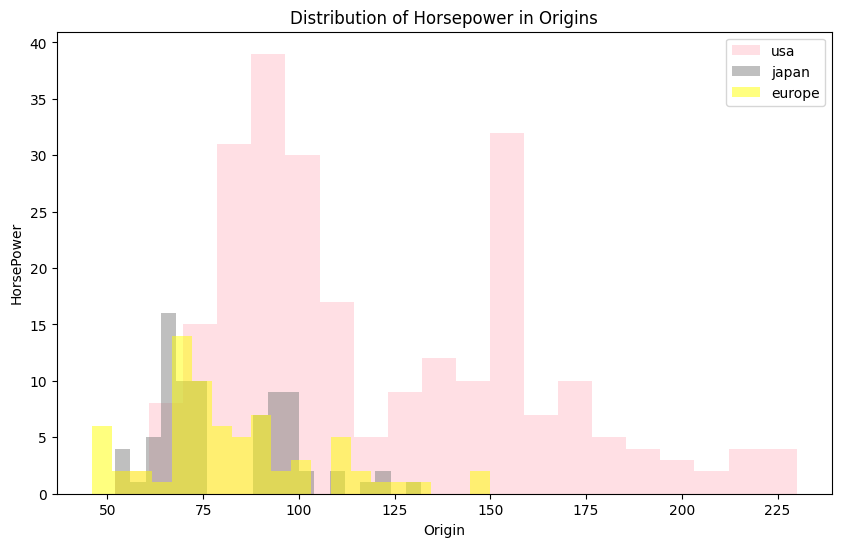

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['origin'] == 'usa']['horsepower'], bins=20, alpha=0.5, label='usa', color='pink')
plt.hist(df[df['origin'] == 'japan']['horsepower'], bins=20, alpha=0.5, label='japan', color='grey')
plt.hist(df[df['origin'] == 'europe']['horsepower'], bins=20, alpha=0.5, label='europe', color='yellow')
plt.xlabel('Origin')
plt.ylabel('HorsePower')
plt.title('Distribution of Horsepower in Origins')
plt.legend()
plt.show()

Scatter plot between horsepower and kmpl seem to be highly correlated, it seems to be a negative correlation and mpg seem to decrease with respect to horsepower. It suggests that cars with higher horsepower tend to have lower fuel efficiency.As more powerful engines often require more fuel to operate.

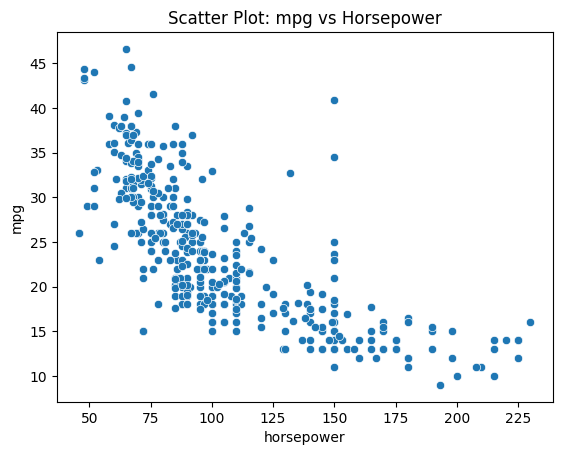

In [ ]:
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Scatter Plot: mpg vs Horsepower')
plt.show()

The line chart shows the difference in mpg with respect the model year. The mpg increasing linearly suggests that, over the years, automobiles have been becoming more fuel-efficient. This is a positive trend and aligns with the industry's efforts to improve fuel efficiency and reduce environmental impact.Automobiles prove to be consistent and a growing industry.

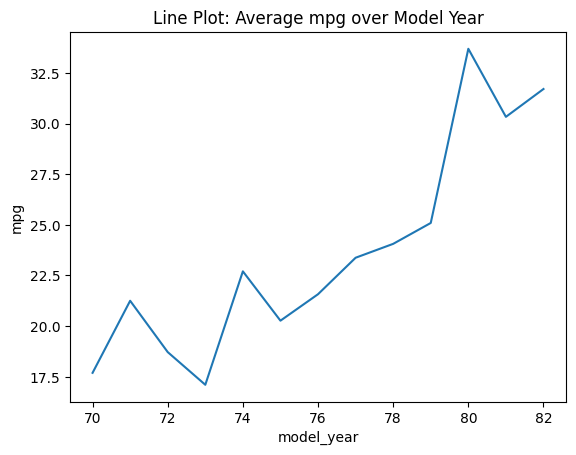

In [ ]:
sns.lineplot(x='model_year', y='mpg', data=df.groupby('model_year')['mpg'].mean().reset_index())
plt.title('Line Plot: Average mpg over Model Year')
plt.show()

The line chart shows the difference in horsepower with respect the  displacement. The displacement increasing linearly suggests that, more the horsepower more the displacement. This is a positive trend and aligns with the industry's efforts to improve fuel efficiency and reduce environmental impact.Automobiles prove to be consistent and a growing industry.

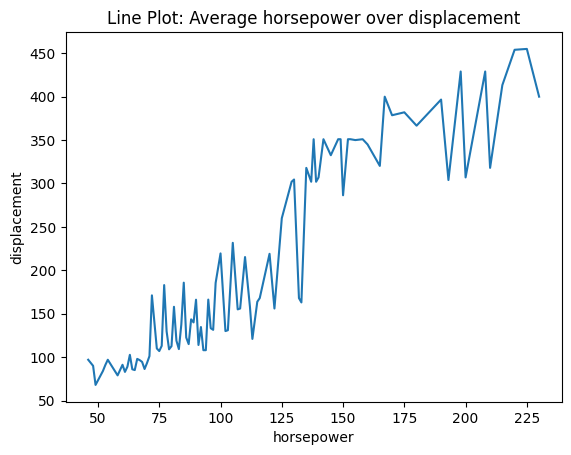

In [ ]:
sns.lineplot(x='horsepower', y='displacement', data=df.groupby('horsepower')['displacement'].mean().reset_index())
plt.title('Line Plot: Average horsepower over displacement')
plt.show()

<ipython-input-64-ac2f130432d7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


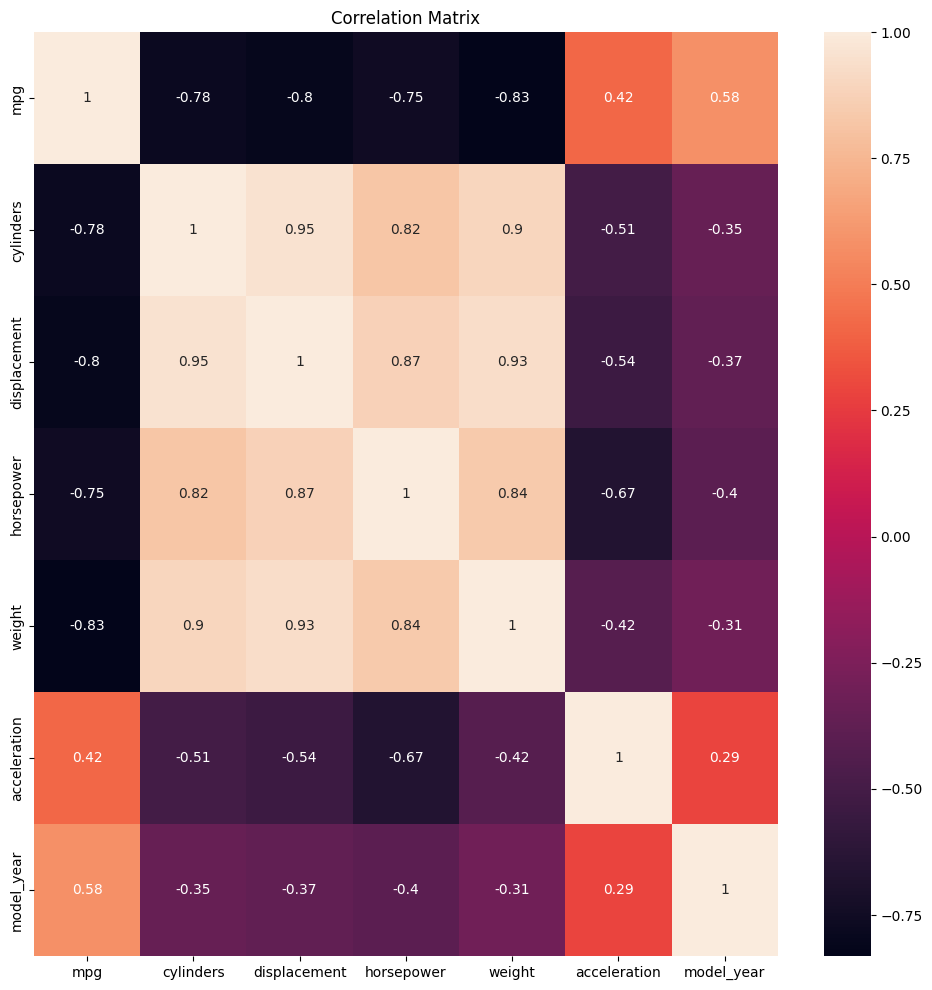

In [ ]:
plt.figure(figsize=(12, 12))

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')

plt.show()

**LINEAR REGRESSION**

Linear Regression Coefficients:
         Variable  Coefficient
0       cylinders    -0.151316
1    displacement     0.018719
2      horsepower    -0.007917
3          weight    -0.007186
4    acceleration     0.097117
5      model_year     0.832917
6         origin1    -0.968475
7   origin_europe     0.106567
8    origin_japan     0.755342
9      origin_usa    -0.861909
10      Intercept   -20.159582

Model Evaluation:
Mean Squared Error: 8.35
R-squared: 0.84
Accuracy: 0.84


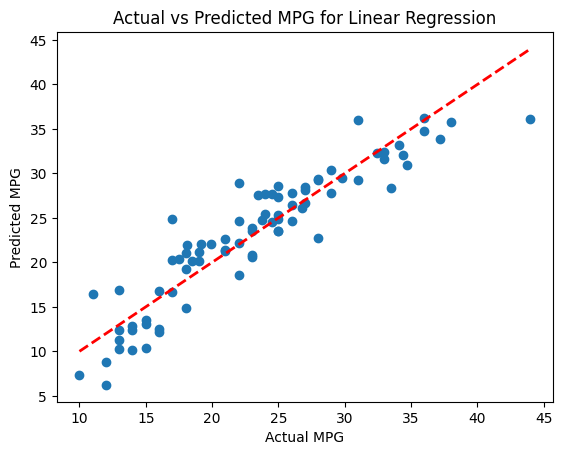

In [ ]:

df_encoded = pd.get_dummies(df, columns=['origin'])
X = df_encoded.drop(columns=['name', 'mpg'])
y = df_encoded['mpg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse1 = mean_squared_error(y_test, y_pred)
r21 = r2_score(y_test, y_pred)

# Display the coefficients and intercept
coefficients = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': model.coef_})
intercept = pd.DataFrame({'Variable': ['Intercept'], 'Coefficient': [model.intercept_]})
coefficients = pd.concat([coefficients, intercept], ignore_index=True)

print("Linear Regression Coefficients:")
print(coefficients)

# Print model evaluation metrics
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse1:.2f}")
print(f"R-squared: {r21:.2f}")
a1 = model.score(X_test, y_test)
print(f"Accuracy: {a1:.2f}")

# Visualize actual vs predicted values along with the regression line
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Regression line
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG for Linear Regression')
plt.show()


The linear regression model is predicting the 'mpg' (Miles Per Gallon) as the target variable, a positive coefficient associated with a particular predictor variable means that, on average, an increase in that predictor variable is associated with an increase in predicted fuel efficiency (MPG). So it can be found from the fitting of linear regression that it is a good fit and that means if mpg increases fuel efficiency also increases

**DECISION TREE**
Decision tree is a graphical representation of all possible solutions based on certain condition.It is used for both classification as well as regression problem.

The internal nodes represent the features of the dataset and branches are the decsiion rules and the leaf node represents the outcome.The best attribute in the dataset is found using Attribute Selection Measure (ASM)---Information Gain and Gini Index.Information gain measures the changes in entropy.information gain must be maximum.
We use (CART)Classification and Regression Tree Algorithm.
An attribute with the low Gini index should be preferred as compared to
the high Gini index.
Entropy measures the impurity/uncertainity present in data.


In [ ]:
label_encoder = LabelEncoder()
df['origin1'] = label_encoder.fit_transform(df['origin'])

Our aim is to shortlist the most important features using entropy DT and Gini entropy.

In [ ]:
features = ['mpg',	'cylinders',	'displacement',	'horsepower',	'weight',	'acceleration','model_year']
X = df[features]

y = df['origin1']

In [ ]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier()

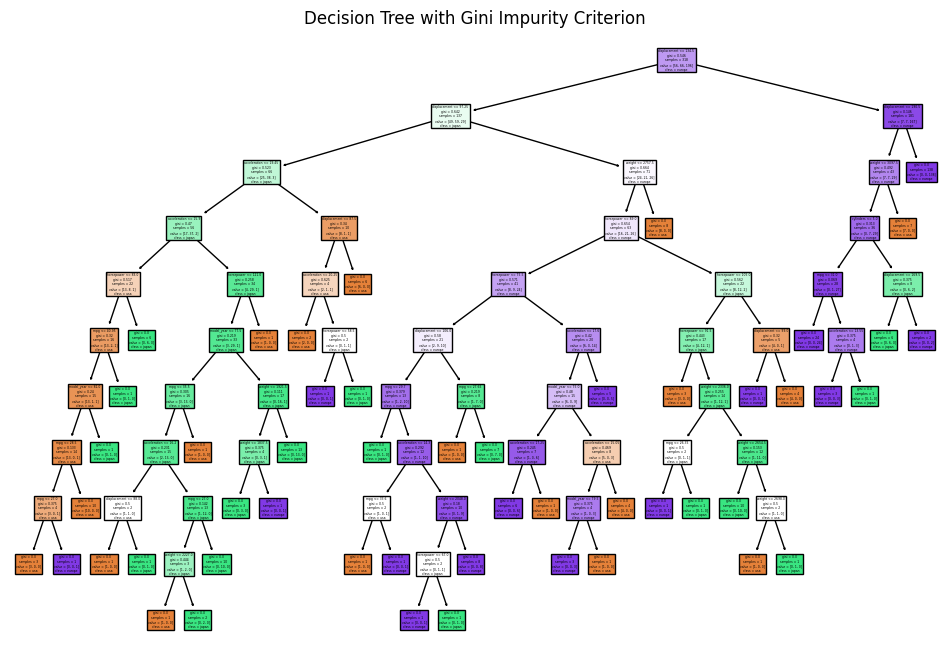

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf_gini, filled=True, feature_names=features, class_names=['usa', 'japan','europe'])
plt.title("Decision Tree with Gini Impurity Criterion")
plt.show()

In [ ]:
accuracy_gini = clf_gini.score(X_test, y_test)
print(f"Accuracy (Gini): {accuracy_gini:.2f}")


clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1)
clf_entropy.fit(X_train, y_train)

Accuracy (Gini): 0.81


DecisionTreeClassifier(criterion='entropy')

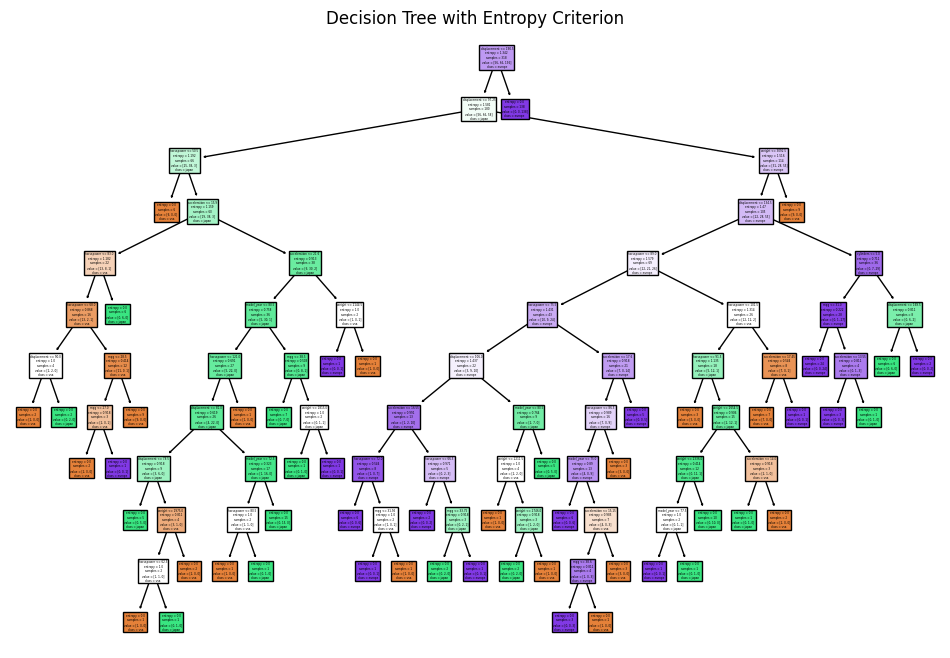

Accuracy (Entropy): 0.80


In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=features, class_names=['usa', 'japan', 'europe'])
plt.title("Decision Tree with Entropy Criterion")
plt.show()

# Evaluate the model on the test set
accuracy_entropy = clf_entropy.score(X_test, y_test)
print(f"Accuracy (Entropy): {accuracy_entropy:.2f}")

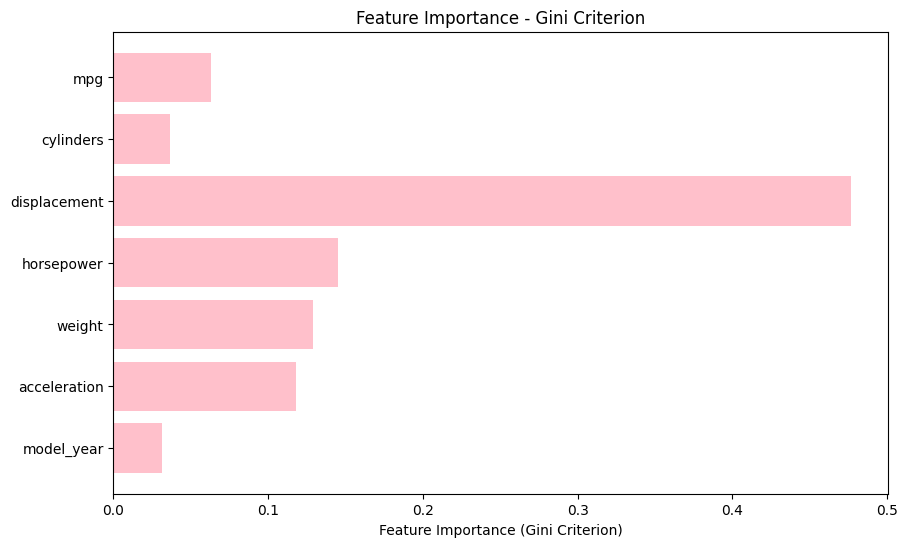

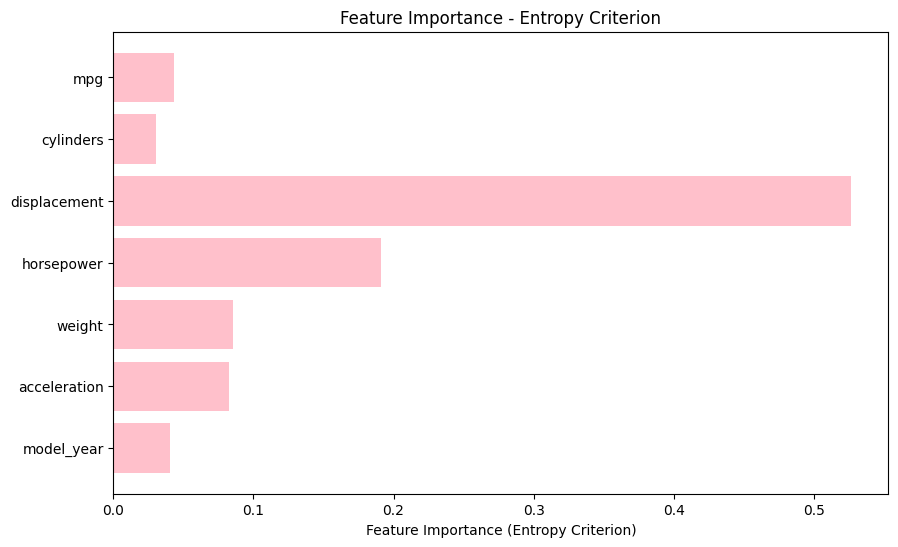

In [ ]:

feature_importance_gini = clf_gini.feature_importances_


feature_importance_entropy = clf_entropy.feature_importances_


feature_names = ['mpg',	'cylinders',	'displacement',	'horsepower',	'weight',	'acceleration','model_year']


plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_gini,color='pink')
plt.xlabel('Feature Importance (Gini Criterion)')
plt.title('Feature Importance - Gini Criterion')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_entropy,color='pink')
plt.xlabel('Feature Importance (Entropy Criterion)')
plt.title('Feature Importance - Entropy Criterion')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred_rf = rf_model.predict(X_test)

# Compute the mean squared error and R-squared of the prediction
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf
a2 = rf_model.score(X_test, y_test)
print('Accuracy:',a2)
print('mse:',mse_rf)
print('R2:',r2_rf)


Accuracy: 0.6733128418859078
mse: 0.19596125
R2: 0.6733128418859078


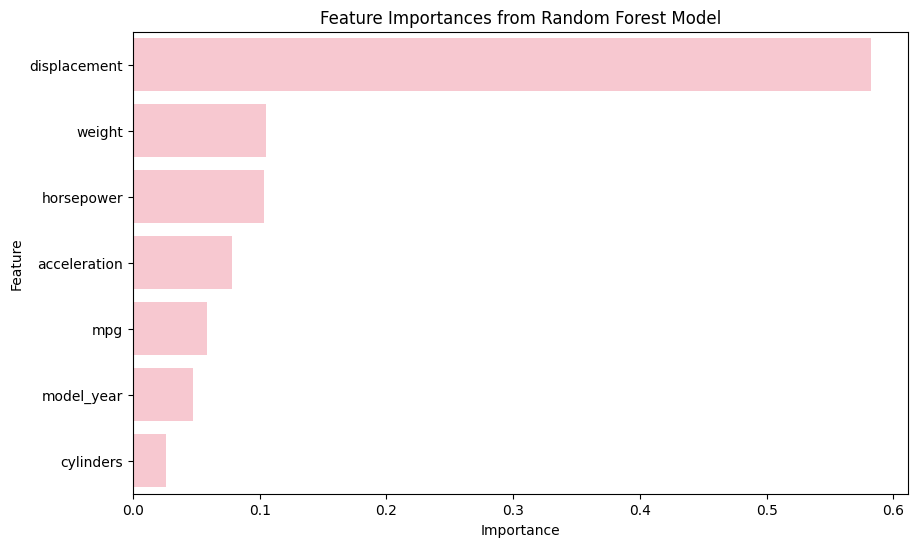

In [ ]:
importances = rf_model.feature_importances_

# Create a dataframe for visualization
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the dataframe by importance score
importances_df = importances_df.sort_values('importance', ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances_df, color='pink')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the grid search with a Random Forest model
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'max_depth': 5,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.5331609006107089)

In [ ]:
# Initialize and fit the Random Forest model with the best hyperparameters
rf_model_best = RandomForestRegressor(**best_params, random_state=42)
rf_model_best.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred_rf_best = rf_model_best.predict(X_test)

# Compute the mean squared error and R-squared of the prediction
mse_rf_best2 = mean_squared_error(y_test, y_pred_rf_best)
r2_rf_best2 = r2_score(y_test, y_pred_rf_best)

mse_rf_best2, r2_rf_best2
a3 = rf_model.score(X_test, y_test)

<ipython-input-78-27c660fb4307>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Mean Squared Error', data=results_df, palette='viridis')
<ipython-input-78-27c660fb4307>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R-squared', data=results_df, palette='viridis')


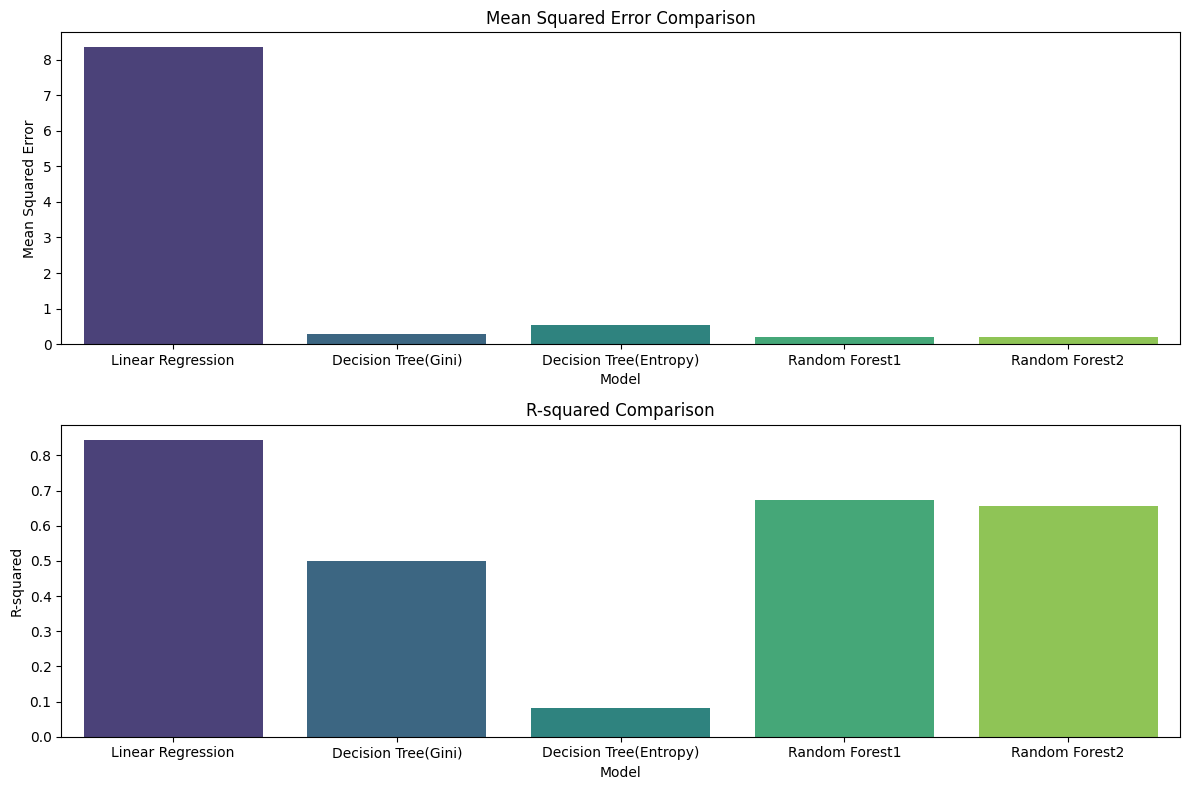

In [ ]:
# Decision Tree
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1)
clf_gini.fit(X_train, y_train)
y_pred_dt = clf_gini.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
mse_entropy = mean_squared_error(y_test, y_pred_entropy)
r2_entropy = r2_score(y_test, y_pred_entropy)


# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree(Gini)','Decision Tree(Entropy)', 'Random Forest1','Random Forest2'],
    'Mean Squared Error': [mse1, mse_dt,mse_entropy, mse_rf,mse_rf_best2],
    'R-squared': [r21, r2_dt,r2_entropy, r2_rf,r2_rf_best2]
})

# Plot the comparison chart
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.barplot(x='Model', y='Mean Squared Error', data=results_df, palette='viridis')
plt.title('Mean Squared Error Comparison')

plt.subplot(2, 1, 2)
sns.barplot(x='Model', y='R-squared', data=results_df, palette='viridis')
plt.title('R-squared Comparison')

plt.tight_layout()
plt.show()


<ipython-input-79-c7cd93b87160>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df1, palette='viridis')


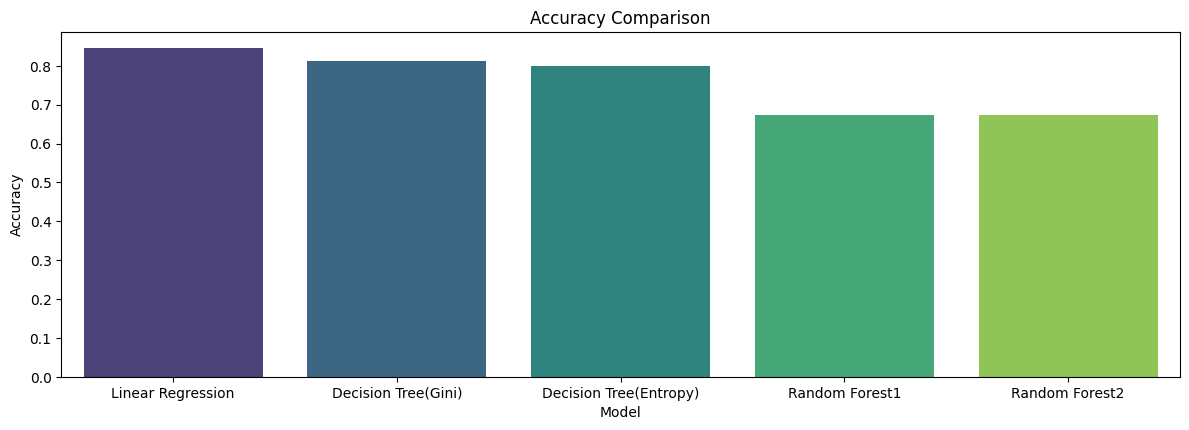

In [ ]:
# Create a DataFrame for visualization
results_df1 = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree(Gini)','Decision Tree(Entropy)', 'Random Forest1','Random Forest2'],
    'Accuracy': [a1, accuracy_gini,accuracy_entropy, a2,a3]
})

# Plot the comparison chart
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.barplot(x='Model', y='Accuracy', data=results_df1, palette='viridis')
plt.title('Accuracy Comparison')



plt.tight_layout()
plt.show()